### This notebook pool all analysis around happyness

In [1]:
%load_ext autoreload
%autoreload 2

import warnings; warnings.simplefilter('ignore')
import os, codecs, string, random
import numpy as np
import pandas as pd

#NLP libraries
import spacy, nltk, gensim, sklearn
import pyLDAvis.gensim_models

#handle str lib
import re

import matplotlib.pyplot as plt

from functions.happyness_helpers import *

pd.set_option('max_colwidth', 500)

#The data
advBeer_root = 'DATA/BeerAdvocate/'
rateBeer_root = 'DATA/RateBeer/'
df_adv_users = pd.read_csv(advBeer_root + 'users.csv')
df_rate_users = pd.read_csv(rateBeer_root + 'users.csv')

In [2]:
# the lines below all to separate the reviews.txt in separate csv for workings with light dataframe

#from functions import read_data
#mysmallreview = read_data.fetch_reviews(rateBeer_root +'RateBeer.tar.gz', max_csv_size = 250000,early_stop = 0)

# Data analysis Starting ...

### Automatic loop for Rate beer by sub csv

In [3]:
#loop_RateBeer_get_pos_neg_words()
# group by country with all dataframe concated
df_all_rb =  ratebeer_merging_csv_results()
country_res_groups_all_rb = df_all_rb.groupby(by='country').apply(weighted_average_all, 'pos_words','neg_words','nb_review')
df_final_rb = pd.DataFrame(country_res_groups_all_rb.tolist(), columns=[['neg_words','pos_words','nb_review']])
df_final_rb['location'] = country_res_groups_all_rb.index

# save the results ratebeer resume
df_final_rb.to_csv(rateBeer_root + 'RateBeer_pos_neg_analysis_resume.csv',index=False)

df_final_rb.shape

(218, 4)

### Automatic loop for all Adv beer by sub csv

In [4]:
# This 
# loop_AdvBeer_get_pos_neg_words()

# Group by country with all dataframe  concated
df_all_adv =  advbeer_merging_csv_results()
country_res_groups_all_adv = df_all_adv.groupby(by='country').apply(weighted_average_all, 'pos_words','neg_words','nb_review')
df_final_adv = pd.DataFrame(country_res_groups_all_adv.tolist(), columns=[['neg_words','pos_words','nb_review']])
df_final_adv['location'] = country_res_groups_all_adv.index

# Save the advocate beer resutls
df_final_adv.to_csv(advBeer_root + 'BeerAdv_pos_neg_analysis_resume.csv',index=False)

df_final_adv.shape

(173, 4)

# Analysis Results AdvBeer and RateBeer

In [5]:
df_final_adv = pd.read_csv(advBeer_root + 'BeerAdv_pos_neg_analysis_resume.csv')
df_final_rate = pd.read_csv(rateBeer_root + 'RateBeer_pos_neg_analysis_resume.csv')

In [6]:
df_final_adv = pd.read_csv(advBeer_root + 'BeerAdv_pos_neg_analysis_resume.csv')
df_final_adv = df_final_adv.loc[df_final_adv['nb_review'] > 1000, :]

# separate us data from other
df_us = df_final_adv.loc[df_final_adv['location'].str.contains('United States'),:]
df_final_adv = df_final_adv.loc[~df_final_adv['location'].str.contains('United States'),:]
df_final_adv = df_final_adv.reset_index(drop = True)

In [7]:
us = weighted_average_all(df_us,'pos_words','neg_words','nb_review')


In [8]:
df_us = pd.DataFrame(columns=df_final_adv.columns.to_list())
df_us.loc[0,'neg_words'] = us[0]
df_us.loc[0,'pos_words'] = us[1]
df_us.loc[0,'nb_review'] = us[2]
df_us.loc[0,'location'] = 'United State'

In [9]:
# df_final_adv.columns = df_us.columns
df_final_adv = pd.concat([df_final_adv,df_us], axis=0, ignore_index=True)

In [10]:
df_final_adv.head(n=30)

,neg_words,pos_words,nb_review,location
0,3.812929,7.367358,24766,Australia
1,2.775019,5.930023,3987,Belgium
2,3.646731,7.282551,121525,Canada
3,3.58835,6.430837,20430,England
4,2.277604,4.341754,3523,France
5,2.976762,6.805797,7832,Germany
6,2.562181,6.454003,1174,Ireland
7,2.251939,4.132209,2965,Italy
8,3.054438,6.295069,2535,Japan
9,2.632086,5.878118,3528,Mexico


In [11]:
df_final_adv.sort_values(by = 'pos_words',  ascending=False).head(n= 25)

,neg_words,pos_words,nb_review,location
11,3.613327,8.544747,2056,Northern Ireland
19,3.597173,7.724382,1415,Switzerland
20,3.222401,7.576099,1866,Thailand
10,3.749363,7.383602,9416,Netherlands
0,3.812929,7.367358,24766,Australia
21,3.315504,7.290309,2009651,United State
2,3.646731,7.282551,121525,Canada
16,3.214607,7.200318,3779,Scotland
5,2.976762,6.805797,7832,Germany
13,3.119416,6.623711,1164,Poland


## Positive and negative words analysis on 30k data

In [12]:
data = []
with open(advBeer_root +'reviews.txt', encoding='utf-8') as f:
    for line in f.readlines():
        line = line[:-1]
        
        if line.startswith('beer_id'):
            beer_id = line[8:]
            continue
            
        if line.startswith('user_id'):
            user_id = line[9:]
            continue
            
        if line.startswith('text'):
            review = line[6:]
            data.append([beer_id, user_id,review])
            continue
       
        
df_reviews_adv = pd.DataFrame(data, columns=["beer_id", "user_id", "review"])
df_reviews_adv_low = df_reviews_adv.iloc[:30000, :]
print(df_reviews_adv_low.shape)


(30000, 3)


In [13]:
df_reviews_adv_low.head()

,beer_id,user_id,review
0,142544,nmann08.184925,"From a bottle, pours a piss yellow color with a fizzy white head. This is carbonated similar to soda.The nose is basic.. malt, corn, a little floral, some earthy straw. The flavor is boring, not offensive, just boring. Tastes a little like corn and grain. Hard to write a review on something so simple.Its ok, could be way worse."
1,19590,stjamesgate.163714,"Pours pale copper with a thin head that quickly goes. Caramel, golden syrup nose. Taste is big toasty, grassy hops backed by dark fruit, candy corn and brack malts. Clingy. Dries out at the end with more hops. Brave, more going on that usual for this type."
2,19590,mdagnew.19527,"500ml Bottle bought from The Vintage, Antrim...Poured a golden yellow / orange colour... White head poured quite thick and foamy and faded to thin layer...Aroma - Fruity (burnt orange, some apple hints), light maltiness, spicy hops, vanilla, some sea saltiness...Taste - Spicy / peppery hop notes, citrusy, light sweetness, grassy, slight creaminess, some bready notes...Feel - Quite sharp and pretty dry. Light body.... Pretty drinkable...Overall - A pretty good beer.... worth a try..."
3,19590,helloloser12345.10867,"Serving: 500ml brown bottlePour: Good head with excellent retention and a slight amount of lacing Appearance: Slightly cloudy golden colour. Smell: Very subtle sweet smell, nothing too distinct comes throughFlavour: Subtle bitter flavour, slight taste of fresh hay. Nice hoppy flavours. Like the smell, no real distinct flavours come through. Overall: Quite a refreshing brew. Nicely balanced. Nice to see a local brewery producing quality beers like this one and long may it continue! Looking fo..."
4,19590,cypressbob.3708,"500ml bottlePours with a light, slightly hazy golden body, light amber in colour. Slight tan head formsSmell, slight hop aromas, some sweetness coming offTaste, well balanced hoppy, nice herby floral hop flavour, nice malt finishA good little brew, this one suprised me"


In [14]:
list_user_location_adv = df_adv_users.loc[df_adv_users['user_id'].isin(df_reviews_adv_low['user_id']),['user_id','location']]
df_reviews_adv_low.loc[:,'location'] = df_reviews_adv_low['user_id'].apply(get_location_user, args= (list_user_location_adv,))
country_groups = df_reviews_adv_low.groupby(by="location")
country_groups.head()

,beer_id,user_id,review,location
0,142544,nmann08.184925,"From a bottle, pours a piss yellow color with a fizzy white head. This is carbonated similar to soda.The nose is basic.. malt, corn, a little floral, some earthy straw. The flavor is boring, not offensive, just boring. Tastes a little like corn and grain. Hard to write a review on something so simple.Its ok, could be way worse.","United States, Washington"
1,19590,stjamesgate.163714,"Pours pale copper with a thin head that quickly goes. Caramel, golden syrup nose. Taste is big toasty, grassy hops backed by dark fruit, candy corn and brack malts. Clingy. Dries out at the end with more hops. Brave, more going on that usual for this type.","United States, New York"
2,19590,mdagnew.19527,"500ml Bottle bought from The Vintage, Antrim...Poured a golden yellow / orange colour... White head poured quite thick and foamy and faded to thin layer...Aroma - Fruity (burnt orange, some apple hints), light maltiness, spicy hops, vanilla, some sea saltiness...Taste - Spicy / peppery hop notes, citrusy, light sweetness, grassy, slight creaminess, some bready notes...Feel - Quite sharp and pretty dry. Light body.... Pretty drinkable...Overall - A pretty good beer.... worth a try...",Northern Ireland
3,19590,helloloser12345.10867,"Serving: 500ml brown bottlePour: Good head with excellent retention and a slight amount of lacing Appearance: Slightly cloudy golden colour. Smell: Very subtle sweet smell, nothing too distinct comes throughFlavour: Subtle bitter flavour, slight taste of fresh hay. Nice hoppy flavours. Like the smell, no real distinct flavours come through. Overall: Quite a refreshing brew. Nicely balanced. Nice to see a local brewery producing quality beers like this one and long may it continue! Looking fo...",Northern Ireland
4,19590,cypressbob.3708,"500ml bottlePours with a light, slightly hazy golden body, light amber in colour. Slight tan head formsSmell, slight hop aromas, some sweetness coming offTaste, well balanced hoppy, nice herby floral hop flavour, nice malt finishA good little brew, this one suprised me",Northern Ireland
...,...,...,...,...
26500,46378,asgeirr.172625,"Appearance: Shepherd's Neame Christmas Ale (vintage 2008) pours a light amber colour along with a white-beige foamy crown that leaves a reasonable amount of lacing on the glass.Smell: A strong and fresh citrusy scent of hops along with some caramel in the back.Taste: Oranges, notes of burnt malt, hints of sweet apricot and a round pleasurable bitterness.Mouthfeel: Flows smoothly all the way down the hatch and manages to feel greatly refreshing despite the fact that it looked like it was low ...",Svalbard and Jan Mayen Islands
26604,305,sunrisesolara.109976,".5L emptied into a Pint Glass.A: Pours reddish copper with a soapy 1-finger tan head which receeds to a thick ring. Gobs of lace.S: Toasted caramel malt, grassy hops, nuts, toffee.M: Medium bodied with low carbonation.T: Caramel malt, mildly bitter hops, fruit, nuts. Nicely hopped, dry finish with a lingering astringent aftertaste. D: Smooth and refreshing. It would be easy to put a few of these down in a night. A quality brew that is typical of the style, but the midrange is just a shade to...",Austria
26778,106722,monkist.1183020,"Wow! how hoppy it smells - I thought. Big, continental hops, on the Saaz-y Chech side I thought.Then I drank it. And none of those hops were there! Rather the grains, whole grains, like in a bread, and even a bit of ground coffee.Funny, as light as this Pale Ale it is, feels like a freshly baked bread.But it's light and mid carbonated - easy to drink. It's not that bad at all. Feels rather lagery with a densely malted overtone, brings even popcorns into your mind.A funny ale, interesting, qu...",Hungary
28592,438,jaz.1249,"Poured like a cold blend of espresso and alcohol. No head at all, and little carbonation. Smell was bold and strong, with a rich aroma of roasted malt, coffee, and alcohol. The taste was the same; kin

In [15]:
# code took from homework 1 
# get the list of positive and negative words from the hw1

import requests
import re

positive_word_document = requests.get("https://ptrckprry.com/course/ssd/data/positive-words.txt")
negative_word_document = requests.get("https://ptrckprry.com/course/ssd/data/negative-words.txt")

positive_words = re.search(r'(?<=;[\r\n]{2}).*',positive_word_document.text,re.DOTALL).group(0).split()
negative_words = re.search(r'(?<=;[\r\n]{2}).*',negative_word_document.text,re.DOTALL).group(0).split()

#dictionary of sentiment words
sentiment_dict = {
    "positive" : positive_words,
    "negative" : negative_words
}

In [16]:
# loop for to check the presences of positifs or negatifs words
data = []

for country, group in country_groups:
    print('country:', country, 'size:', group.shape[0])
    
    for key in sentiment_dict:
        negative_words = []
        positive_words = []
        
        negative_words.append(group.apply(lambda row : indicator_words('negative',row['review'],sentiment_dict),axis=1))
        positive_words.append(group.apply(lambda row : indicator_words('positive',row['review'],sentiment_dict),axis=1))


        data.append([country,np.mean(negative_words),np.mean(positive_words), group.shape[0]])
        
    resultats_pos_neg_words = pd.DataFrame(data, columns=["country","neg_words", "pos_words", "nb_review"])
    
resultats_pos_neg_words.head(n=20)

country: American Samoa size: 1
country: Antarctica size: 2
country: Aotearoa size: 5
country: Australia size: 989
country: Austria size: 4
country: Bahamas size: 2
country: Belgium size: 42
country: Brazil size: 23
country: Canada size: 2918
country: China size: 20
country: Croatia size: 13
country: Cyprus size: 9
country: Czech Republic size: 3
country: Denmark size: 10
country: England size: 2672
country: Finland size: 23
country: France size: 117
country: Germany size: 179
country: Greece size: 29
country: Guernsey size: 1
country: Hong Kong size: 31
country: Hungary size: 3
country: Ireland size: 85
country: Italy size: 103
country: Japan size: 60
country: Jersey size: 50
country: Jordan size: 1
country: Lesotho size: 6
country: Luxembourg size: 2
country: Malaysia size: 5
country: Malta size: 2
country: Mexico size: 50
country: Netherlands size: 196
country: Northern Ireland size: 359
country: Norway size: 99
country: Panama size: 4
country: Philippines size: 1
country: Poland si

,country,neg_words,pos_words,nb_review
0,American Samoa,2.000000,5.000000,1
1,American Samoa,2.000000,5.000000,1
2,Antarctica,3.500000,3.000000,2
3,Antarctica,3.500000,3.000000,2
4,Aotearoa,2.000000,4.400000,5
5,Aotearoa,2.000000,4.400000,5
6,Australia,3.497472,6.940344,989
7,Australia,3.497472,6.940344,989
8,Austria,3.250000,4.500000,4
9,Austria,3.250000,4.500000,4


#  Sentiments Analysis with nlp

Testing the sentiment analysis saw in course, to know if it could be interesting or not. 
The analysis shows that most of the reviews are rather neutral which is why we did not decide to make a more accurate analysis of the reviews' feelings. This neutral feeling is understandable as the users' reviews describe a lot the beer.

In [17]:
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
nlp = spacy.load('en_core_web_sm')

In [18]:
# try a simple example to check the code is okay
example = df_reviews_adv_low.review[0]
vs = analyzer.polarity_scores(example)
print(example, '\n')
print('Negative sentiment:',vs['neg'])
print('Neutral sentiment:',vs['neu'])
print('Positive sentiment:',vs['pos'])
print('Compound sentiment:',vs['compound'])

From a bottle, pours a piss yellow color with a fizzy white head.  This is carbonated similar to soda.The nose is basic.. malt, corn, a little floral, some earthy straw.  The flavor is boring, not offensive, just boring.  Tastes a little like corn and grain.  Hard to write a review on something so simple.Its ok, could be way worse. 

Negative sentiment: 0.139
Neutral sentiment: 0.763
Positive sentiment: 0.098
Compound sentiment: -0.4312


In [19]:
# Positive, Negatids and neutral sentiment analysis by taking the mean of every review sentiment per country
data = []

# loop for to compute the mean for each country
for country, group in country_groups:
    negative_sent = []
    positive_sent = []
    neutre_sent=[]
    [negative_sent.append(analyzer.polarity_scores(sent)['neg']) for sent in group.review]
    [positive_sent.append(analyzer.polarity_scores(sent)['pos']) for sent in group.review]
    [neutre_sent.append(analyzer.polarity_scores(sent)['neu']) for sent in group.review]

    data.append([country,np.array(negative_sent).mean(),np.array(positive_sent).mean(), 
                 np.array(neutre_sent).mean(), group.shape[0]])
    print('country:', country, data[-1])
    

resultats_sentiments = pd.DataFrame(data, columns=["country","neg sentiment", "pos sentiment", "neu sentiment", "nb of review"])

country: American Samoa ['American Samoa', 0.163, 0.107, 0.73, 1]
country: Antarctica ['Antarctica', 0.0475, 0.09949999999999999, 0.853, 2]
country: Aotearoa ['Aotearoa', 0.023200000000000002, 0.1546, 0.8221999999999999, 5]
country: Australia ['Australia', 0.04432558139534884, 0.14904752275025276, 0.80662891809909, 989]
country: Austria ['Austria', 0.0535, 0.107, 0.839, 4]
country: Bahamas ['Bahamas', 0.051000000000000004, 0.1445, 0.8045, 2]
country: Belgium ['Belgium', 0.045785714285714284, 0.15933333333333333, 0.7948333333333334, 42]
country: Brazil ['Brazil', 0.059739130434782614, 0.15482608695652172, 0.7854347826086957, 23]
country: Canada ['Canada', 0.038459904043865664, 0.1502820424948595, 0.8112590815627142, 2918]
country: China ['China', 0.03585000000000001, 0.16949999999999998, 0.7945999999999999, 20]
country: Croatia ['Croatia', 0.08600000000000001, 0.1543846153846154, 0.7596153846153846, 13]
country: Cyprus ['Cyprus', 0.013444444444444446, 0.16588888888888886, 0.820555555555

country: United States, New Hampshire ['United States, New Hampshire', 0.03147727272727273, 0.13845129870129871, 0.8300681818181819, 308]
country: United States, New Jersey ['United States, New Jersey', 0.03852173913043478, 0.15862422360248446, 0.8028881987577638, 644]
country: United States, New Mexico ['United States, New Mexico', 0.03967441860465116, 0.11983720930232557, 0.840511627906977, 43]
country: United States, New York ['United States, New York', 0.04291317365269461, 0.14364610778443113, 0.8134425149700599, 1670]
country: United States, North Carolina ['United States, North Carolina', 0.035394904458598726, 0.14177388535031846, 0.8228455414012739, 628]
country: United States, North Dakota ['United States, North Dakota', 0.02804545454545455, 0.18022727272727276, 0.7916363636363638, 22]
country: United States, Ohio ['United States, Ohio', 0.034986159169550175, 0.15062514417531717, 0.8143990772779701, 867]
country: United States, Oklahoma ['United States, Oklahoma', 0.03648936170

In [20]:
resultats_sentiments.head(n=18)

,country,neg sentiment,pos sentiment,neu sentiment,nb of review
0,American Samoa,0.163000,0.107000,0.730000,1
1,Antarctica,0.047500,0.099500,0.853000,2
2,Aotearoa,0.023200,0.154600,0.822200,5
3,Australia,0.044326,0.149048,0.806629,989
4,Austria,0.053500,0.107000,0.839000,4
5,Bahamas,0.051000,0.144500,0.804500,2
6,Belgium,0.045786,0.159333,0.794833,42
7,Brazil,0.059739,0.154826,0.785435,23
8,Canada,0.038460,0.150282,0.811259,2918
9,China,0.035850,0.169500,0.794600,20


In [ ]:
ROW = 20000
df_reviews_adv_low.shape

plt.close('all')
fig = plt.figure(figsize=(16,6))

ax1 = plt.subplot(141)
ax2 = plt.subplot(142)
ax3 = plt.subplot(143)
ax4 = plt.subplot(144)

negative_sent = []
[negative_sent.append(analyzer.polarity_scores(sent)['neg']) for sent in df_reviews_adv_low.review]
ax1.hist(negative_sent,bins=15)
ax1.set(xlim = [0,1], ylim = [0,ROW] , xlabel='Negative sentiment', ylabel = 'Number of review') 

positive_sent = []
[positive_sent.append(analyzer.polarity_scores(sent)['pos']) for sent in df_reviews_adv_low.review]
ax2.hist(positive_sent,bins=15)
ax2.set(xlim = [0,1], ylim = [0,ROW] , xlabel='Positive sentiment', ylabel = 'Number of review') 

total_sent = []
[total_sent.append(analyzer.polarity_scores(sent)['compound']) for sent in df_reviews_adv_low.review]
ax3.hist(total_sent,bins=15)
ax3.set(xlim = [0,1], ylim = [0,ROW] , xlabel='Compound sentiment', ylabel = 'Number of review') 

neutre_sent = []
[neutre_sent.append(analyzer.polarity_scores(sent)['neu']) for sent in df_reviews_adv_low.review]
ax4.hist(neutre_sent,bins=15)
ax4.set(xlim = [0,1], ylim = [0,ROW] , xlabel='Neutral sentiment', ylabel = 'Number of review') 

plt.tight_layout()

In [24]:
df_rev_low_sco = df_reviews_adv_low.loc[df_reviews_adv_low['location'] == 'Scotland',:]
df_rev_low_wal = df_reviews_adv_low.loc[df_reviews_adv_low['location'] == 'Wales',:]
df_rev_low_ir = df_reviews_adv_low.loc[df_reviews_adv_low['location'] == 'Northern Ireland',:]

[(0.0, 1.0),
 (0.0, 1000.0),
 Text(0.5, 0, 'Negative sentiment Northern Ireland'),
 Text(0, 0.5, 'Number of review gabon')]

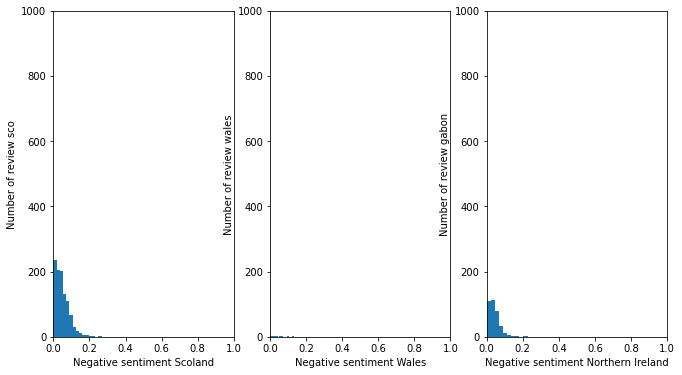

In [30]:
plt.close('all')
fig = plt.figure(figsize=(11,6))

ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

negative_sent = []
[negative_sent.append(analyzer.polarity_scores(sent)['neg']) for sent in df_rev_low_sco.review]
ax1.hist(negative_sent,bins=15)
ax1.set(xlim = [0,1], ylim = [0,1000] , xlabel='Negative sentiment Scoland', ylabel = 'Number of review sco') 

negative_sent = []
[negative_sent.append(analyzer.polarity_scores(sent)['neg']) for sent in df_rev_low_wal.review]
ax2.hist(negative_sent,bins=15)
ax2.set(xlim = [0,1], ylim = [0,500] , xlabel='Negative sentiment Wales', ylabel = 'Number of review wales') 

negative_sent = []
[negative_sent.append(analyzer.polarity_scores(sent)['neg']) for sent in df_rev_low_ir.review]
ax3.hist(negative_sent,bins=10)
ax3.set(xlim = [0,1], ylim = [0,1000] , xlabel='Negative sentiment Northern Ireland', ylabel = 'Number of review gabon') 




[(0.0, 1.0),
 (0.0, 1000.0),
 Text(0.5, 0, 'Positive sentiment Northern Ireland'),
 Text(0, 0.5, 'Number of review Northern Ireland')]

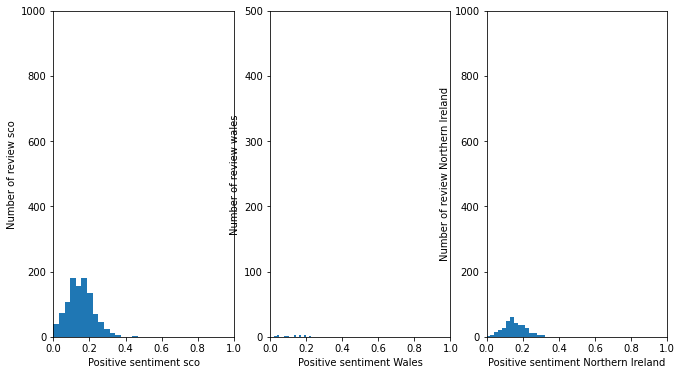

In [35]:
plt.close('all')
fig2 = plt.figure(figsize=(11,6))

ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

positive_sent = []
[positive_sent.append(analyzer.polarity_scores(sent)['pos']) for sent in df_rev_low_sco.review]
ax1.hist(positive_sent,bins=15)
ax1.set(xlim = [0,1], ylim = [0,1000] , xlabel='Positive sentiment sco', ylabel = 'Number of review sco') 

positive_sent=[]
[positive_sent.append(analyzer.polarity_scores(sent)['pos']) for sent in df_rev_low_wal.review]
ax2.hist(positive_sent,bins=15)
ax2.set(xlim = [0,1], ylim = [0,500] , xlabel='Positive sentiment Wales', ylabel = 'Number of review wales') 

positive_sent=[]
[positive_sent.append(analyzer.polarity_scores(sent)['pos']) for sent in df_rev_low_ir.review]
ax3.hist(positive_sent,bins=15)
ax3.set(xlim = [0,1], ylim = [0,1000] , xlabel='Positive sentiment Northern Ireland', ylabel = 'Number of review Northern Ireland') 

[(0.0, 1.0),
 (0.0, 1000.0),
 Text(0.5, 0, 'Neutral sentiment Northern Ireland'),
 Text(0, 0.5, 'Number of review Northern Ireland')]

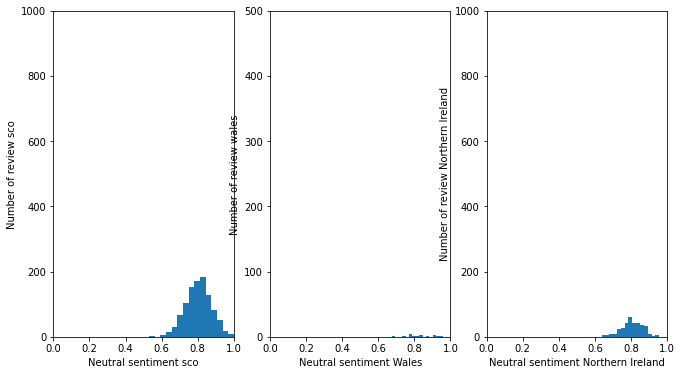

In [33]:
plt.close('all')
fig2 = plt.figure(figsize=(11,6))

ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

neutre_sent = []
[neutre_sent.append(analyzer.polarity_scores(sent)['neu']) for sent in df_rev_low_sco.review]
ax1.hist(neutre_sent,bins=15)
ax1.set(xlim = [0,1], ylim = [0,1000] , xlabel='Neutral sentiment sco', ylabel = 'Number of review sco') 

neutre_sent=[]
[neutre_sent.append(analyzer.polarity_scores(sent)['neu']) for sent in df_rev_low_wal.review]
ax2.hist(neutre_sent,bins=15)
ax2.set(xlim = [0,1], ylim = [0,500] , xlabel='Neutral sentiment Wales', ylabel = 'Number of review wales') 

neutre_sent=[]
[neutre_sent.append(analyzer.polarity_scores(sent)['neu']) for sent in df_rev_low_ir.review]
ax3.hist(neutre_sent,bins=15)
ax3.set(xlim = [0,1], ylim = [0,1000] , xlabel='Neutral sentiment Northern Ireland', ylabel = 'Number of review Northern Ireland') 